In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
data = pd.read_csv('./input/train.csv') # read the train data in data DataFrame

In [3]:
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data.Cabin.fillna('U',inplace=True)
data.Embarked.fillna('S',inplace=True)
data.Fare.fillna(data.Fare.mean(),inplace=True)
data.Age.fillna(data.Age.median(), inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


          male  female
Total      577     314
Survived   109     233
Died       468      81


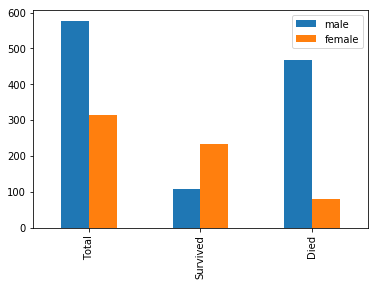

In [7]:
total = data['Sex'].value_counts()
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
died_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([total,survived_sex,died_sex])
df.index = ['Total','Survived','Died']
print(df)
df.plot(kind='bar')

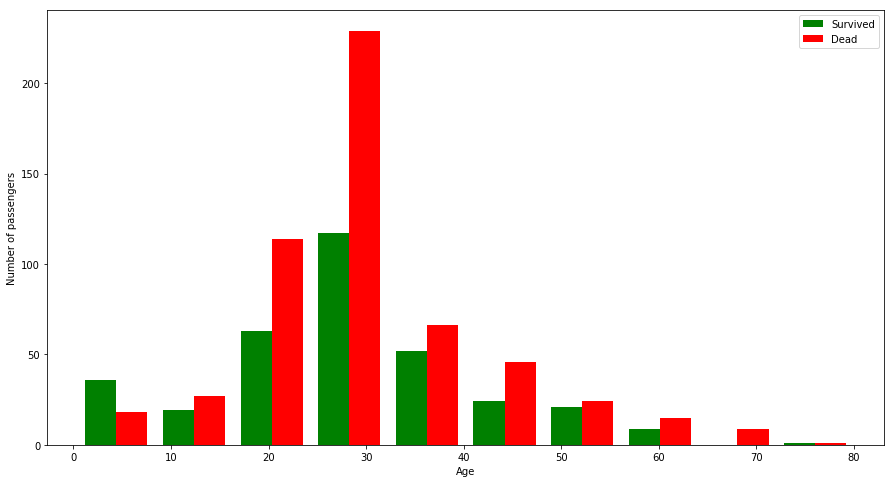

In [8]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

             0    1  total
1st class   80  136    216
2nd class   97   87    184
3rd class  372  119    491


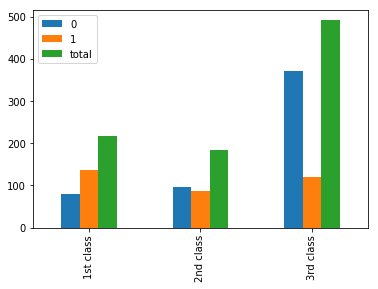

In [9]:
survived_1 = data[data['Pclass']==1]['Survived'].value_counts()
survived_2 = data[data['Pclass']==2]['Survived'].value_counts()
survived_3 = data[data['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={0:'Survived',1:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

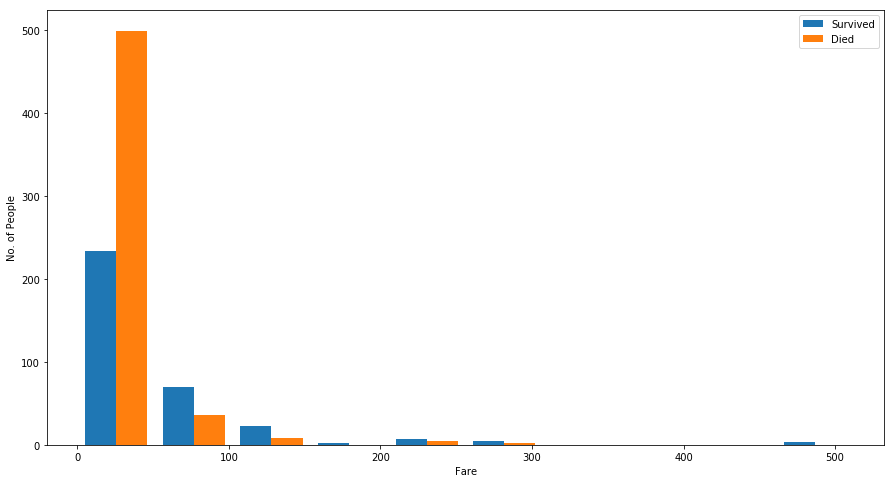

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

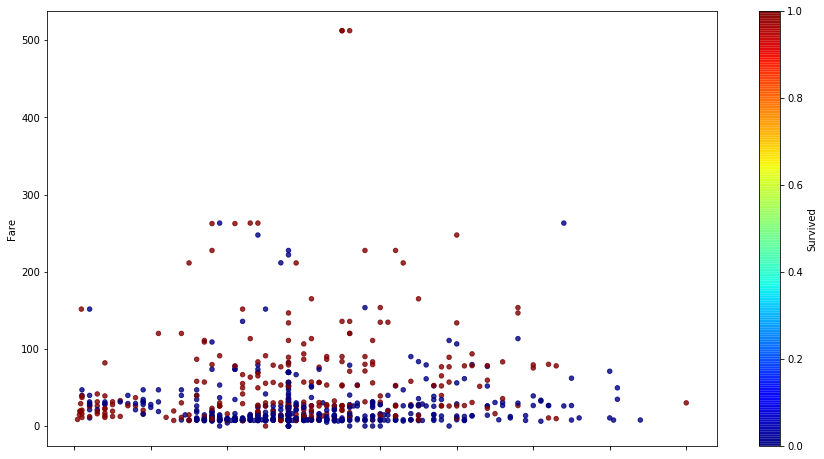

In [11]:
data.plot.scatter('Age','Fare',c='Survived',colormap='jet',alpha=0.8,figsize=(15,8))

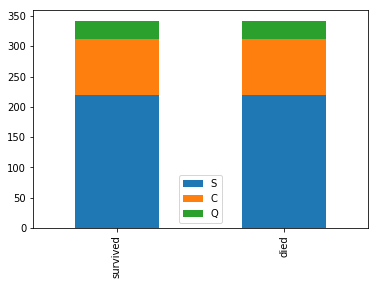

In [12]:
survived_embarkment  = data[data['Survived']==1]['Embarked'].value_counts()
died_embarkment = data[data['Survived']==1]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarkment,died_embarkment])
df.index=['survived','died']
df.plot(kind='bar',stacked=True)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

C:\Users\manik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
data_set = data[['Pclass','Sex','Age','Fare','SibSp','Cabin']]
one_hot_encoded_training_predictors = pd.get_dummies(data_set)
one_hot_encoded_training_predictors.head()
X = one_hot_encoded_training_predictors
y = data['Survived']

In [15]:
#dividing the data in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.319, random_state=1)
logreg = LogisticRegression() #logistic regression using python
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = logreg.predict(X_test) #predicting the values
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.8
